## Imports


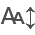

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

## Loading data

In [2]:
data = pd.read_excel(
    "../data/who_aap_2021_v9_11august2022.xlsx", sheet_name="AAP_2022_city_v9"
)
data.columns = [
    "WHO Region",
    "ISO3",
    "WHO Country Name",
    "City or Locality",
    "Measurement Year",
    "PM2.5",
    "PM10",
    "NO2",
    "PM2.5 temporal coverage",
    "PM10 temporal coverage",
    "NO2 temporal coverage",
    "Reference",
    "Number and type of monitoring stations",
    "Version of the database",
    "Status",
]
data

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                  2019  119.77    NaN    NaN                     18.0   
1                  2015     NaN  17.65  26.63                      NaN   
2                  2016   14.32  24.56  24.78                      NaN   
3                  2015     NaN    NaN  23.96                      NaN   
4                  2016     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186              2015    7.47  24.64   7.64                     75.0   
32187              2016    8.42  33.28   7.27                     75.0   
32188              2017    6.83  20.49   8.72                     75.0   
32189              2018    6.10  17.99   7.15                     75.0   
32190              2016     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
0                         NaN                    NaN   
1                         NaN              83.961187   
2                         NaN              87.932605   
3                         NaN              97.853881   
4                         NaN              96.049636   
...                       ...                    ...   
32186                    75.0              75.000000   
32187                    75.0              75.000000   
32188                    75.0              75.000000   
32189                    75.0              75.000000   
32190                     NaN              75.000000   

                                               Reference  \
0      U.S. Department of State, United States Enviro...   
1       European Environment Agency (downloaded in 2021)   
2       European Environment Agency (downloaded in 2021)   
3       European Environment Agency (downloaded in 2021)   
4       European Environment Agency (downloaded in 2021)   
...                                                  ...   
32186       South African Air Quality Information System   
32187       South African Air Quality Information System   
32188       South African Air Quality Information System   
32189       South African Air Quality Information System   
32190       South African Air Quality Information System   

      Number and type of monitoring stations  Version of the database  Status  
0                                        NaN                     2022     NaN  
1                                        NaN                     2022     NaN  
2                                        NaN                     2022     NaN  
3                                        NaN                     2022     NaN  
4                                        NaN                     2022     NaN  
...                                      ...                      ...     ...  
32186      3 Residential-Medium/Upper income                     2022     NaN  
32187      2 Residential-Medium/Upper income                     2022     NaN  
32188      2 Residential-Medium/Upper income                     2022     NaN  
32189

## Data review

#### Data types

In [3]:
data.dtypes

WHO Region                                 object
ISO3                                       object
WHO Country Name                           object
City or Locality                           object
Measurement Year                            int64
PM2.5                                     float64
PM10                                      float64
NO2                                       float64
PM2.5 temporal coverage                   float64
PM10 temporal coverage                    float64
NO2 temporal coverage                     float64
Reference                                  object
Number and type of monitoring stations     object
Version of the database                     int64
Status                                    float64
dtype: object

In [4]:
data["PM2.5"] = data["PM2.5"].astype(float)
data["PM2.5 temporal coverage"] = data["PM2.5 temporal coverage"].astype(float)
data.dtypes

WHO Region                                 object
ISO3                                       object
WHO Country Name                           object
City or Locality                           object
Measurement Year                            int64
PM2.5                                     float64
PM10                                      float64
NO2                                       float64
PM2.5 temporal coverage                   float64
PM10 temporal coverage                    float64
NO2 temporal coverage                     float64
Reference                                  object
Number and type of monitoring stations     object
Version of the database                     int64
Status                                    float64
dtype: object

#### Basic statistics

In [5]:
data.describe()

Measurement Year         PM2.5          PM10           NO2  \
count      32191.000000  15048.000000  21109.000000  22200.000000   
mean        2015.579354     22.920320     30.533252     20.619336   
std            2.752654     17.925906     29.312756     12.133388   
min         2000.000000      0.010000      1.040000      0.000000   
25%         2014.000000     10.350000     16.980000     12.000000   
50%         2016.000000     16.000000     22.000000     18.800000   
75%         2018.000000     31.000000     31.300000     27.160000   
max         2021.000000    191.900000    540.000000    210.680000   

       PM2.5 temporal coverage  PM10 temporal coverage  NO2 temporal coverage  \
count              7275.000000             5381.000000           19890.000000   
mean                 90.794096               90.583500              93.696804   
std                  14.872681               13.816311              10.451751   
min                   0.000000                2.568493               1.923077   
25%                  88.595890               87.945205              93.207763   
50%                  97.000000               96.039000              96.369863   
75%                  99.000000               98.938000              98.926941   
max                 100.000000              100.000000             100.000000   

       Version of the database  Status  
count             32191.000000     0.0  
mean               2021.744214     NaN  
std                   1.051897     NaN  
min                2016.000000     NaN  
25%                2022.000000     NaN  
50%                2022.000000     NaN  
75%                2022.000000     NaN  
max                2022.000000     NaN

The minimum and maximum values in PM2.5 temporal coverage, PM10 temporal coverage and NO2 temporal coverage are consistent with logic (knowing that these are percents), so there are no outliers in these columns. Measurement Year and Version of the database columns also seems not to contain any outliers. As for PM2.5, PM10 and NO2 columns - they may have some outliers, but having in mind that this is the dataset about air pollution, it is inadvisable to remove possible outliers.

#### NAs

In [6]:
data.isna().sum()

WHO Region                                    1
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
PM2.5                                     17143
PM10                                      11082
NO2                                        9991
PM2.5 temporal coverage                   24916
PM10 temporal coverage                    26810
NO2 temporal coverage                     12301
Reference                                     5
Number and type of monitoring stations    23433
Version of the database                       0
Status                                    32191
dtype: int64

#### Checking the NA in WHO Region column

In [7]:
data[data["WHO Region"].isna()]

WHO Region ISO3 WHO Country Name City or Locality  Measurement Year  \
24778        NaN  LIE    Liechtenstein            Vaduz              2010   

       PM2.5   PM10    NO2  PM2.5 temporal coverage  PM10 temporal coverage  \
24778    NaN  17.88  23.59                      NaN                  96.164   

       NO2 temporal coverage  \
24778                 98.265   

                                               Reference  \
24778  European Environment Information and Observati...   

      Number and type of monitoring stations  Version of the database  Status  
24778                                    NaN                     2022     NaN

In [8]:
data["WHO Region"].unique()

array(['Eastern Mediterranean Region', 'European Region',
       'Region of the Americas', 'Western Pacific Region',
       'South East Asia Region', 'African Region', nan], dtype=object)

In [9]:
na_slice = data[data["WHO Region"].isna()].copy()
na_slice.fillna({"WHO Region": "European Region"}, inplace=True)
data.update(na_slice)
data[data["ISO3"] == "LIE"]

WHO Region ISO3 WHO Country Name City or Locality  \
24778  European Region  LIE    Liechtenstein            Vaduz   

       Measurement Year  PM2.5   PM10    NO2  PM2.5 temporal coverage  \
24778            2010.0    NaN  17.88  23.59                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
24778                  96.164                 98.265   

                                               Reference  \
24778  European Environment Information and Observati...   

      Number and type of monitoring stations  Version of the database  Status  
24778                                    NaN                   2022.0     NaN

#### Checking NAs in Reference column

In [10]:
data[data["Reference"].isna()]

WHO Region ISO3 WHO Country Name City or Locality  \
28209  Eastern Mediterranean Region  QAT            Qatar             Doha   
28210  Eastern Mediterranean Region  QAT            Qatar             Doha   
28211  Eastern Mediterranean Region  QAT            Qatar             Doha   
28212  Eastern Mediterranean Region  QAT            Qatar             Doha   
28213  Eastern Mediterranean Region  QAT            Qatar             Doha   

       Measurement Year  PM2.5   PM10   NO2  PM2.5 temporal coverage  \
28209            2017.0   44.0  148.0  29.0                     98.0   
28210            2018.0   44.0  181.0  47.0                     99.0   
28211            2019.0   41.0  208.0  42.0                     97.0   
28212            2020.0   33.0  108.0  28.0                     98.0   
28213            2021.0   38.0  150.0  30.0                     97.0   

       PM10 temporal coverage  NO2 temporal coverage Reference  \
28209                    96.0                   99.0       NaN   
28210                    97.0                   99.0       NaN   
28211                    97.0                   99.0       NaN   
28212                    98.0                   99.0       NaN   
28213                    96.0                   99.0       NaN   

          Number and type of monitoring stations  Version of the database  \
28209  Roadside, residential and commercial area                   2022.0   
28210  Roadside, residential and commercial area                   2022.0   
28211  Roadside, residential and commercial area                   2022.0   
28212  Roadside, residential and commercial area                   2022.0   
28213  Roadside, residential and commercial area                   2022.0   

       Status  
28209     NaN  
28210     NaN  
28211     NaN  
28212     NaN  
28213     NaN

Due to the fact that there is no more data about Doha in this dataset and the Reference columns is not crucial in this analysis, I decided to leaves these NAs as it is.

#### NAs in Number and type of monitoring stations column
As in the following year, the number and types of station may vary it would be misleading to fill missing stations with the values, for example, available for the different year. Also, some sources did not provide this data at all, so I am not able to estimate which and how much stations they used. Therefore I can't do anything with these NAs - removing them would shorten this dataset a lot. (MNAR)

#### Relation between variables

In [11]:
# sns.pairplot(data, hue="WHO Region").fig.suptitle(
#     "Relations and distributions of variables vs WHO region", y=1.05, fontsize=20
# )
# plt.show()

## Feature selection and feature engineering

In [12]:
data.drop(columns=["Version of the database", "Status"], inplace=True)

I decided to remove "Status" columns, because it consisted of 100% NaNs. Additionally I dropped "Version of the database" column as it didn't contribute to the explanation of air pollution.

In [13]:
def extract_and_sum_numbers(text):
    if pd.notna(text):
        numbers = [
            int(word.split()[0])
            for word in text.split(",")
            if word.strip()[0].isdigit()
        ]
        return sum(numbers)
    else:
        return np.nan


data["Total number of stations"] = data["Number and type of monitoring stations"].apply(
    extract_and_sum_numbers
)
data

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                2019.0  119.77    NaN    NaN                     18.0   
1                2015.0     NaN  17.65  26.63                      NaN   
2                2016.0   14.32  24.56  24.78                      NaN   
3                2015.0     NaN    NaN  23.96                      NaN   
4                2016.0     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186            2015.0    7.47  24.64   7.64                     75.0   
32187            2016.0    8.42  33.28   7.27                     75.0   
32188            2017.0    6.83  20.49   8.72                     75.0   
32189            2018.0    6.10  17.99   7.15                     75.0   
32190            2016.0     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
0                         NaN                    NaN   
1                         NaN              83.961187   
2                         NaN              87.932605   
3                         NaN              97.853881   
4                         NaN              96.049636   
...                       ...                    ...   
32186                    75.0              75.000000   
32187                    75.0              75.000000   
32188                    75.0              75.000000   
32189                    75.0              75.000000   
32190                     NaN              75.000000   

                                               Reference  \
0      U.S. Department of State, United States Enviro...   
1       European Environment Agency (downloaded in 2021)   
2       European Environment Agency (downloaded in 2021)   
3       European Environment Agency (downloaded in 2021)   
4       European Environment Agency (downloaded in 2021)   
...                                                  ...   
32186       South African Air Quality Information System   
32187       South African Air Quality Information System   
32188       South African Air Quality Information System   
32189       South African Air Quality Information System   
32190       South African Air Quality Information System   

      Number and type of monitoring stations  Total number of stations  
0                                        NaN                       NaN  
1                                        NaN                       NaN  
2                                        NaN                       NaN  
3                                        NaN                       NaN  
4                                        NaN                       NaN  
...                                      ...                       ...  
32186      3 Residential-Medium/Upper income                       3.0  
32187      2 Residential-Medium/Upper income                       2.0  
32188      2 Residential-Medium/Upper income                       2.0  
32189      2 Residential-Medium/Upper income                       2.0  
32

In [14]:
mapping_dict_region = {
    value: index + 1 for index, value in enumerate(data["WHO Region"].unique())
}
mapping_dict_region

{'Eastern Mediterranean Region': 1,
 'European Region': 2,
 'Region of the Americas': 3,
 'Western Pacific Region': 4,
 'South East Asia Region': 5,
 'African Region': 6}

In [15]:
# data["WHO Region encoded"] = data["WHO Region"].map(mapping_dict_region)
# data
region_dummies = pd.get_dummies(data["WHO Region"])
data_dummies = pd.concat([data, region_dummies], axis=1)
data_dummies

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                2019.0  119.77    NaN    NaN                     18.0   
1                2015.0     NaN  17.65  26.63                      NaN   
2                2016.0   14.32  24.56  24.78                      NaN   
3                2015.0     NaN    NaN  23.96                      NaN   
4                2016.0     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186            2015.0    7.47  24.64   7.64                     75.0   
32187            2016.0    8.42  33.28   7.27                     75.0   
32188            2017.0    6.83  20.49   8.72                     75.0   
32189            2018.0    6.10  17.99   7.15                     75.0   
32190            2016.0     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
0                         NaN                    NaN   
1                         NaN              83.961187   
2                         NaN              87.932605   
3                         NaN              97.853881   
4                         NaN              96.049636   
...                       ...                    ...   
32186                    75.0              75.000000   
32187                    75.0              75.000000   
32188                    75.0              75.000000   
32189                    75.0              75.000000   
32190                     NaN              75.000000   

                                               Reference  \
0      U.S. Department of State, United States Enviro...   
1       European Environment Agency (downloaded in 2021)   
2       European Environment Agency (downloaded in 2021)   
3       European Environment Agency (downloaded in 2021)   
4       European Environment Agency (downloaded in 2021)   
...                                                  ...   
32186       South African Air Quality Information System   
32187       South African Air Quality Information System   
32188       South African Air Quality Information System   
32189       South African Air Quality Information System   
32190       South African Air Quality Information System   

      Number and type of monitoring stations  Total number of stations  \
0                                        NaN                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                        NaN                       NaN   
4                                        NaN                       NaN   
...                                      ...                       ...   
32186      3 Residential-Medium/Upper income                       3.0   
32187      2 Residential-Medium/Upper income                       2.0   
32188      2 Residential-Medium/Upper income                       2.0   
32189      2 Residential-Medium/Upper income                     

In [16]:
country_dummies = pd.get_dummies(data["WHO Country Name"])
data_dummies = pd.concat([data_dummies, country_dummies], axis=1)
data_dummies

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                2019.0  119.77    NaN    NaN                     18.0   
1                2015.0     NaN  17.65  26.63                      NaN   
2                2016.0   14.32  24.56  24.78                      NaN   
3                2015.0     NaN    NaN  23.96                      NaN   
4                2016.0     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186            2015.0    7.47  24.64   7.64                     75.0   
32187            2016.0    8.42  33.28   7.27                     75.0   
32188            2017.0    6.83  20.49   8.72                     75.0   
32189            2018.0    6.10  17.99   7.15                     75.0   
32190            2016.0     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  ...  Uganda Ukraine United Arab Emirates  \
0                         NaN  ...       0       0                    0   
1                         NaN  ...       0       0                    0   
2                         NaN  ...       0       0                    0   
3                         NaN  ...       0       0                    0   
4                         NaN  ...       0       0                    0   
...                       ...  ...     ...     ...                  ...   
32186                    75.0  ...       0       0                    0   
32187                    75.0  ...       0       0                    0   
32188                    75.0  ...       0       0                    0   
32189                    75.0  ...       0       0                    0   
32190                     NaN  ...       0       0                    0   

       United Kingdom  United Republic of Tanzania  United States of America  \
0                   0                            0                         0   
1                   0                            0                         0   
2                   0                            0                         0   
3                   0                            0                         0   
4                   0                            0                         0   
...               ...                          ...                       ...   
32186               0                            0                         0   
32187               0                            0                         0   
32188               0                            0                         0   
32189               0                            0                         0   
32190               0                            0                         0   

       Uruguay  Uzbekistan  Venezuela (Bolivarian Republic of)  Viet Nam  
0            0           0                                   0         0  
1            0           0                                   0         0  
2            0           0                                   0         0  
3            0           0           

## WHO Region-based analysis

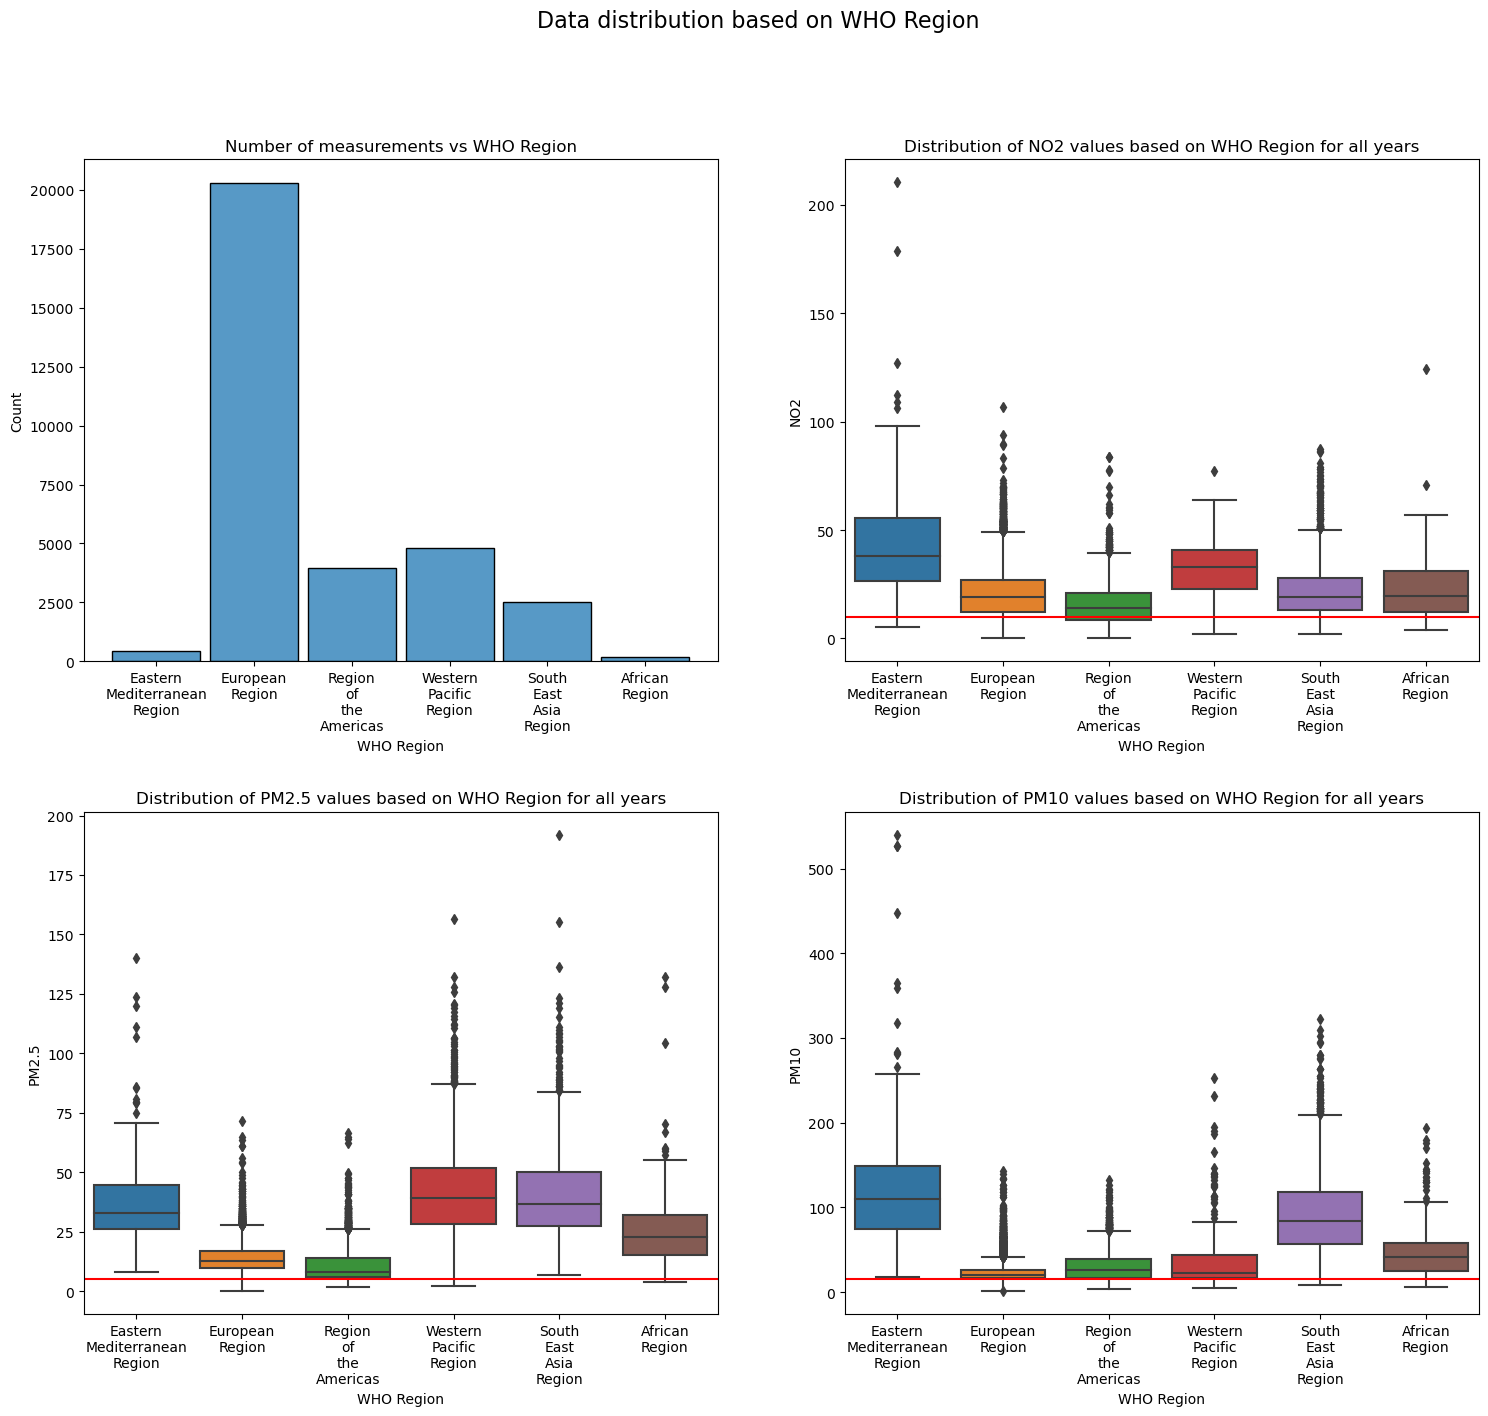

In [17]:
xlabels = [x.replace(" ", "\n") for x in data["WHO Region"].unique()]
xlabels

fig, ax = plt.subplots(2, 2, figsize=(18, 15))

sns.histplot(data=data, x="WHO Region", ax=ax[0, 0], shrink=0.9)
ax[0, 0].set_xticks(ticks=range(len(xlabels)), labels=xlabels)
ax[0, 0].set(title="Number of measurements vs WHO Region")

sns.boxplot(data=data, y="NO2", x="WHO Region", ax=ax[0, 1])
ax[0, 1].axhline(y=10, color="r")
ax[0, 1].set_xticks(ticks=range(len(xlabels)), labels=xlabels)
ax[0, 1].set(title="Distribution of NO2 values based on WHO Region for all years")

sns.boxplot(data=data, y="PM2.5", x="WHO Region", ax=ax[1, 0])
ax[1, 0].axhline(y=5, color="r")
ax[1, 0].set_xticks(ticks=range(len(xlabels)), labels=xlabels)
ax[1, 0].set(title="Distribution of PM2.5 values based on WHO Region for all years")

sns.boxplot(data=data, y="PM10", x="WHO Region", ax=ax[1, 1])
ax[1, 1].axhline(y=15, color="r")
ax[1, 1].set_xticks(ticks=range(len(xlabels)), labels=xlabels)
ax[1, 1].set(title="Distribution of PM10 values based on WHO Region for all years")

plt.suptitle("Data distribution based on WHO Region", fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

#### Correlation

In [18]:
data.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5', 'PM10', 'NO2', 'PM2.5 temporal coverage',
       'PM10 temporal coverage', 'NO2 temporal coverage', 'Reference',
       'Number and type of monitoring stations', 'Total number of stations'],
      dtype='object')

In [19]:
corr_cols = [
    "Measurement Year",
    "PM2.5",
    "PM10",
    "NO2",
    "PM2.5 temporal coverage",
    "PM10 temporal coverage",
    "NO2 temporal coverage",
    "Total number of stations",
]

corr_df = data[corr_cols].corr()

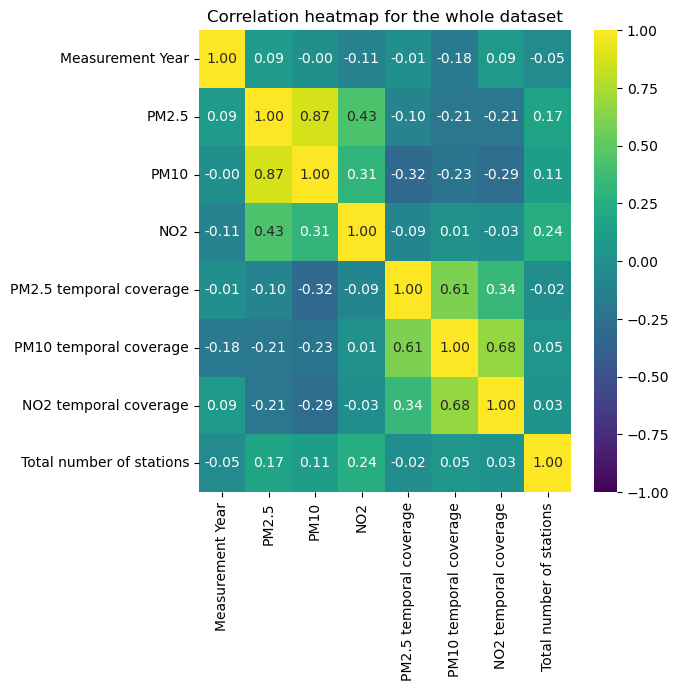

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.heatmap(
    corr_df,
    ax=ax,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    annot_kws={"fontsize": 10},
)
ax.set(title="Correlation heatmap for the whole dataset")

plt.show()

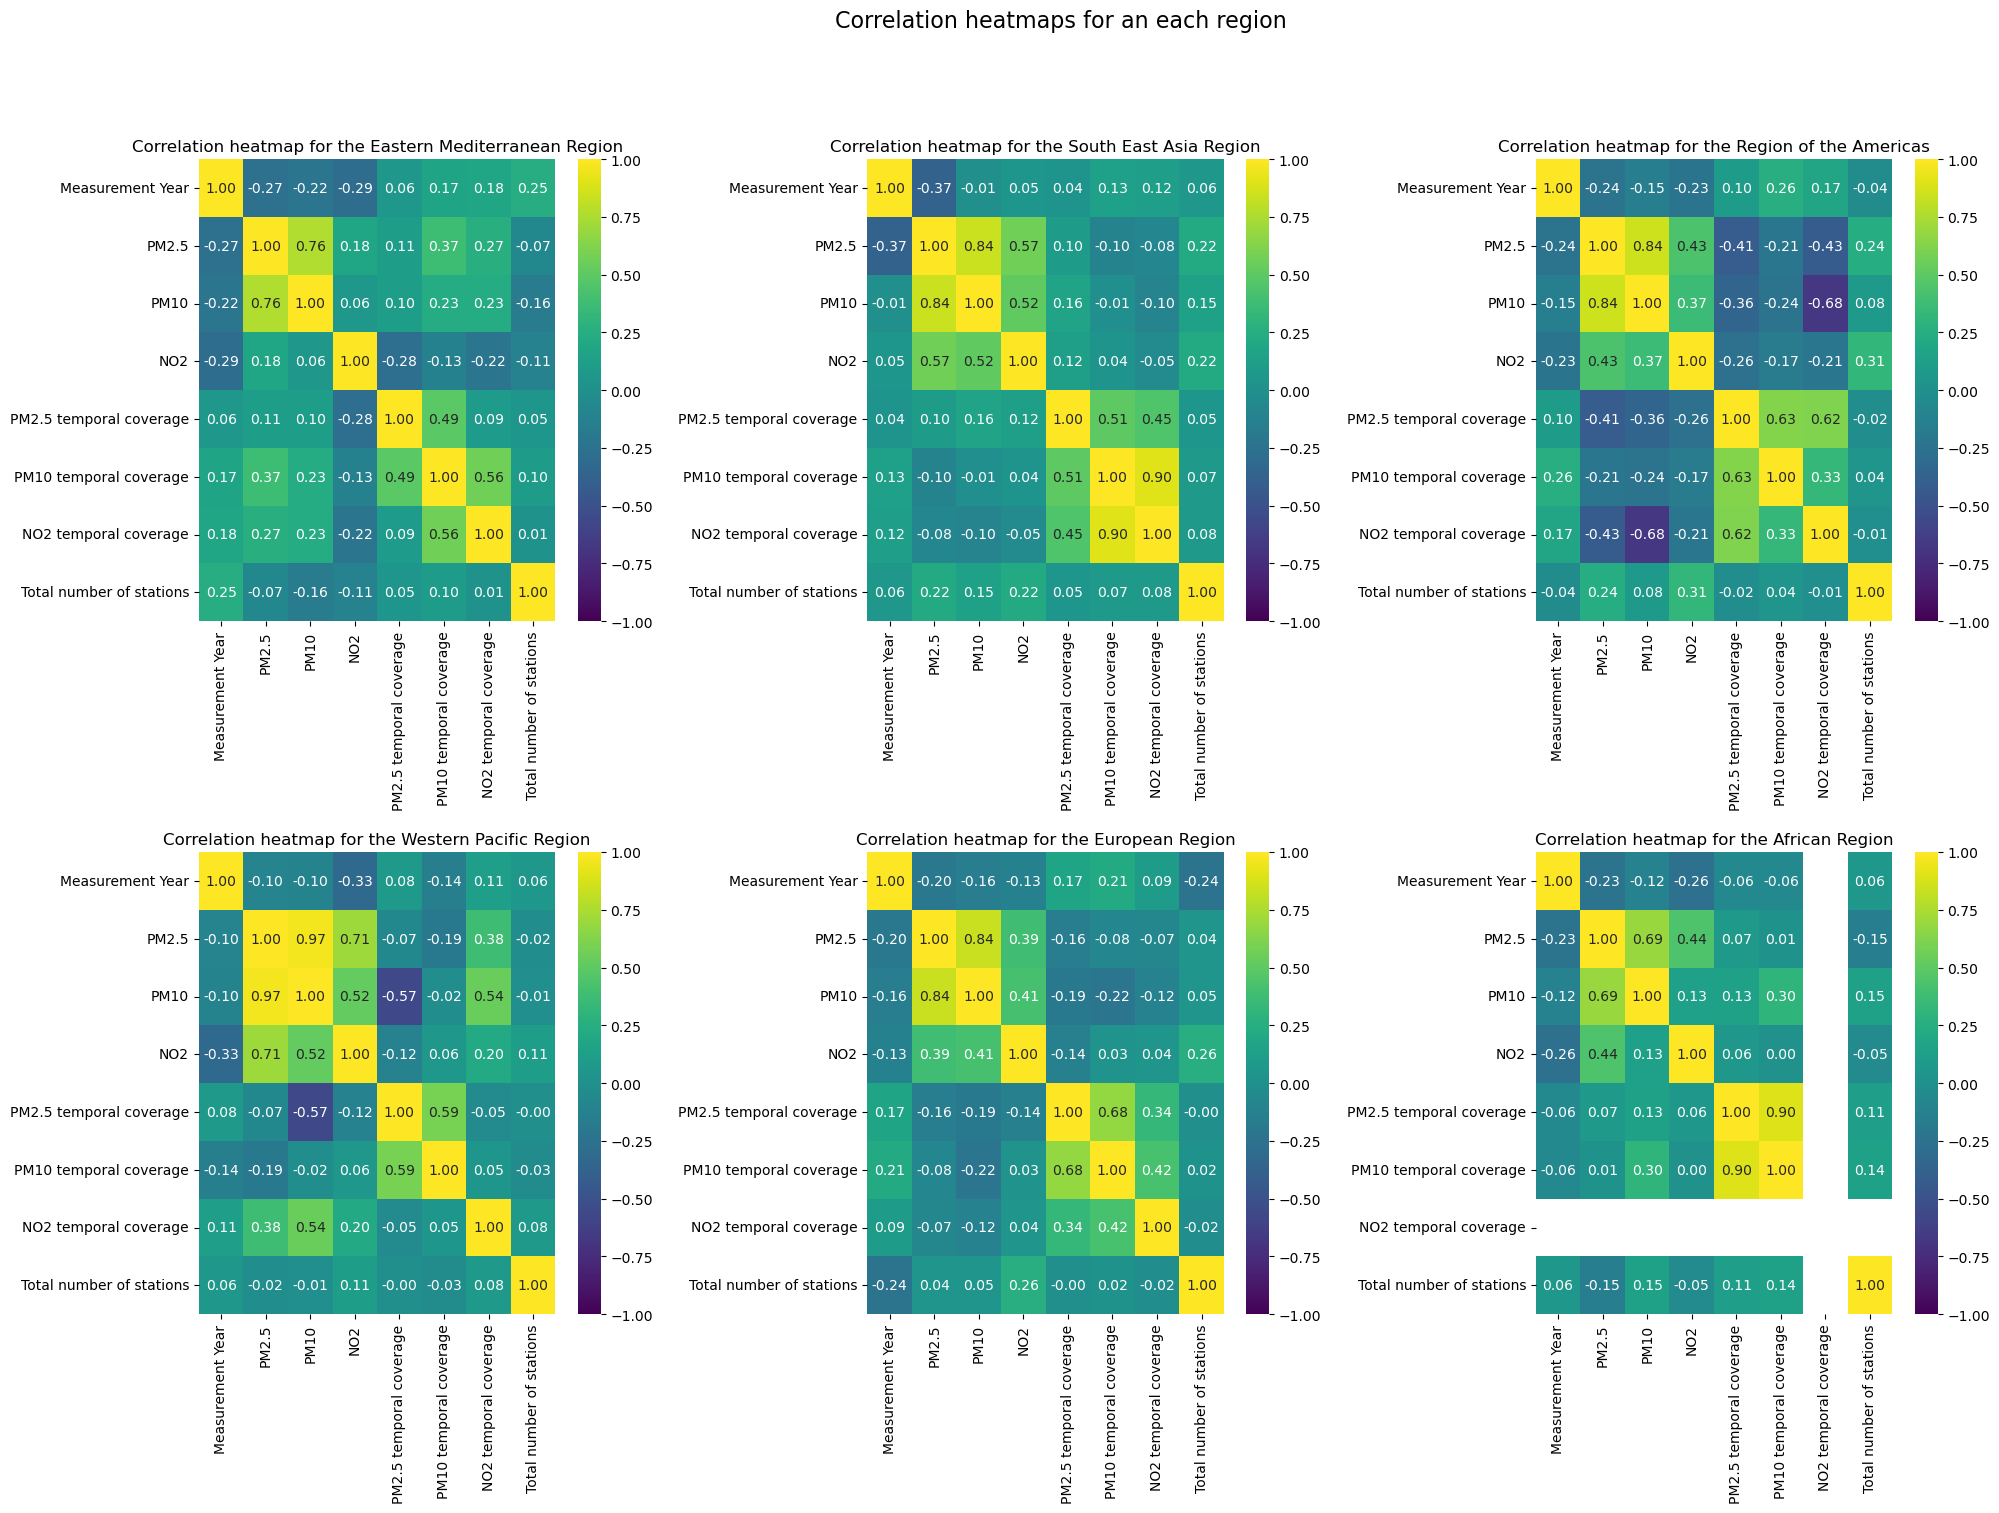

In [21]:
i = 0
j = 0

fig, ax = plt.subplots(2, 3, figsize=(23, 15))

for r in data["WHO Region"].unique():
    corr_df = data[data["WHO Region"] == r][corr_cols].corr()
    sns.heatmap(
        corr_df,
        ax=ax[i][j],
        vmin=-1,
        vmax=1,
        center=0,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        annot_kws={"fontsize": 10},
    )
    ax[i][j].set(title=f"Correlation heatmap for the {r}")
    i += 1
    i %= 2
    j += 1
    j %= 3

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Correlation heatmaps for an each region", fontsize=16)
plt.show()

#### Point-biserial correlation

In [22]:
for r in data_dummies["WHO Region"].unique():
    print(f"\n{r}:")
    for c in corr_cols:
        temp_df = data_dummies.dropna(subset=c)
        print(f"{r} vs {c}: {stats.pointbiserialr(temp_df[r], temp_df[c])}")


Eastern Mediterranean Region:
Eastern Mediterranean Region vs Measurement Year: SignificanceResult(statistic=-0.020433493981191153, pvalue=0.00024600122593072257)
Eastern Mediterranean Region vs PM2.5: SignificanceResult(statistic=0.1031366363946883, pvalue=7.199182966700921e-37)
Eastern Mediterranean Region vs PM10: SignificanceResult(statistic=0.36426022043226786, pvalue=0.0)
Eastern Mediterranean Region vs NO2: SignificanceResult(statistic=0.17002278268537616, pvalue=1.264128529846678e-143)
Eastern Mediterranean Region vs PM2.5 temporal coverage: SignificanceResult(statistic=-0.14136809403182024, pvalue=8.62450943600881e-34)
Eastern Mediterranean Region vs PM10 temporal coverage: SignificanceResult(statistic=-0.07623380154639861, pvalue=2.1558817653567293e-08)
Eastern Mediterranean Region vs NO2 temporal coverage: SignificanceResult(statistic=-0.007052246771967366, pvalue=0.31995921477155914)
Eastern Mediterranean Region vs Total number of stations: SignificanceResult(statistic=0.0

#### Air pollution across years

In [23]:
grouped_df_pm25 = data.groupby(["WHO Region", "Measurement Year"])["PM2.5"].mean(
    numeric_only=True
)
grouped_df_pm10 = data.groupby(["WHO Region", "Measurement Year"])["PM10"].mean(
    numeric_only=True
)
grouped_df_no2 = data.groupby(["WHO Region", "Measurement Year"])["NO2"].mean(
    numeric_only=True
)

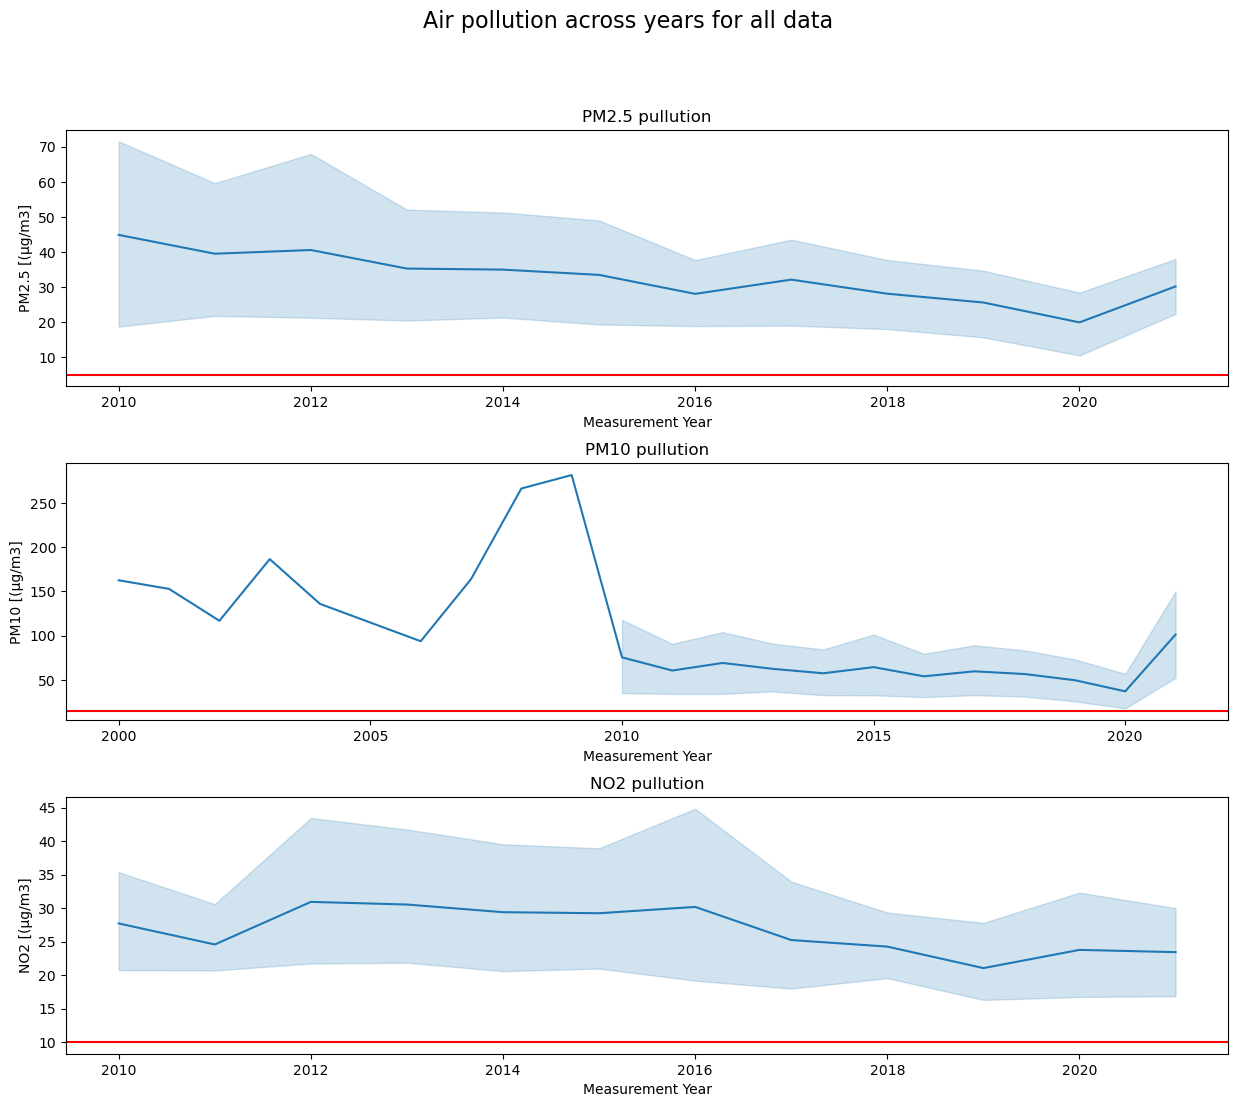

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

sns.lineplot(grouped_df_pm25, x="Measurement Year", y=grouped_df_pm25.values, ax=ax[0])
ax[0].axhline(y=5, color="r")
ax[0].set(title="PM2.5 pullution", ylabel="PM2.5 [(μg/m3]")

sns.lineplot(grouped_df_pm10, x="Measurement Year", y=grouped_df_pm10.values, ax=ax[1])
ax[1].axhline(y=15, color="r")
ax[1].set(title="PM10 pullution", ylabel="PM10 [(μg/m3]")

sns.lineplot(grouped_df_no2, x="Measurement Year", y=grouped_df_no2.values, ax=ax[2])
ax[2].axhline(y=10, color="r")
ax[2].set(title="NO2 pullution", ylabel="NO2 [(μg/m3]")

plt.suptitle("Air pollution across years for all data", fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

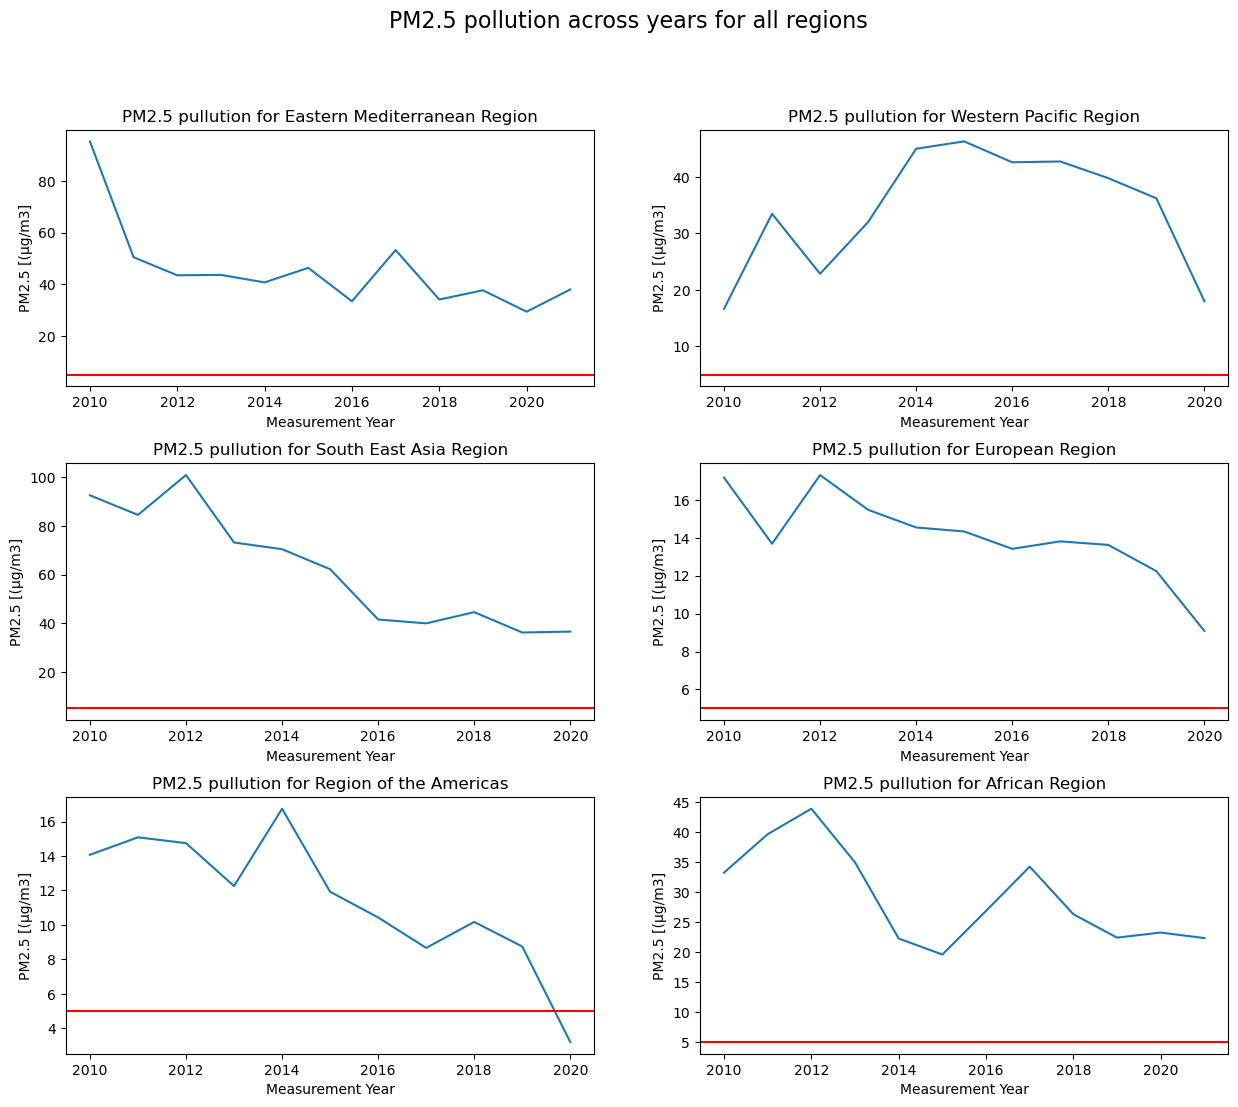

In [25]:
i = 0
j = 0

fig, ax = plt.subplots(3, 2, figsize=(15, 12))

for r in data["WHO Region"].unique():

    sub_grouped_df = grouped_df_pm25[
        grouped_df_pm25.index.get_level_values("WHO Region").isin([r])
    ]

    sns.lineplot(
        sub_grouped_df,
        x="Measurement Year",
        y=sub_grouped_df.values,
        ax=ax[i, j],
    )
    ax[i, j].axhline(y=5, color="r")
    ax[i, j].set(title=f"PM2.5 pullution for {r}", ylabel="PM2.5 [(μg/m3]")
    i += 1
    i %= 3
    j += 1
    j %= 2

plt.suptitle("PM2.5 pollution across years for all regions", fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

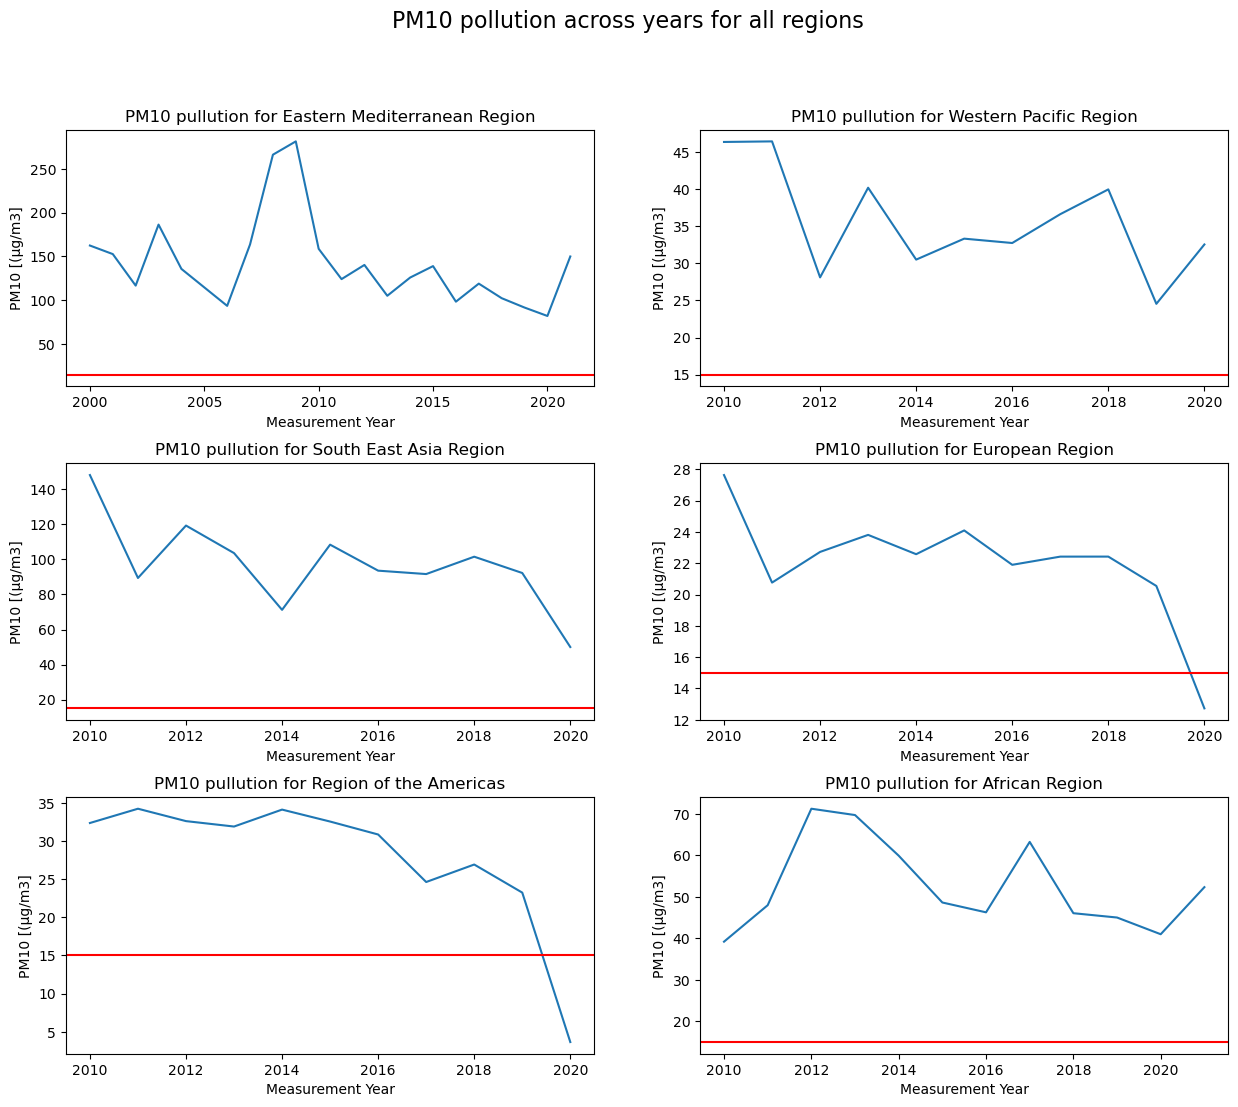

In [26]:
i = 0
j = 0

fig, ax = plt.subplots(3, 2, figsize=(15, 12))

for r in data["WHO Region"].unique():

    sub_grouped_df = grouped_df_pm10[
        grouped_df_pm10.index.get_level_values("WHO Region").isin([r])
    ]

    sns.lineplot(
        sub_grouped_df,
        x="Measurement Year",
        y=sub_grouped_df.values,
        ax=ax[i, j],
    )
    ax[i, j].axhline(y=15, color="r")
    ax[i, j].set(title=f"PM10 pullution for {r}", ylabel="PM10 [(μg/m3]")
    i += 1
    i %= 3
    j += 1
    j %= 2

plt.suptitle("PM10 pollution across years for all regions", fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

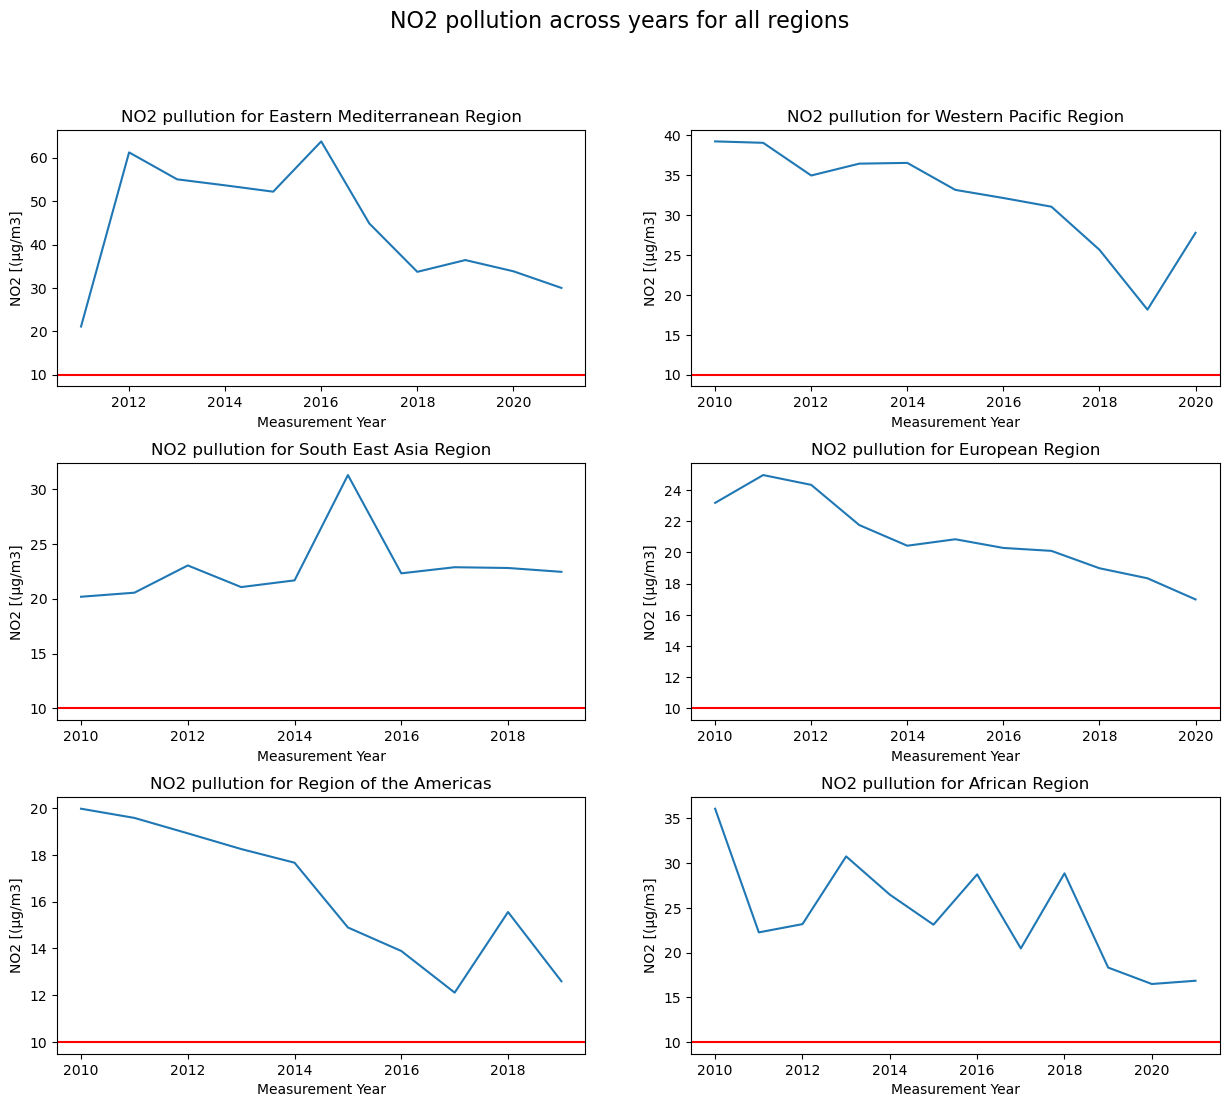

In [27]:
i = 0
j = 0

fig, ax = plt.subplots(3, 2, figsize=(15, 12))

for r in data["WHO Region"].unique():

    sub_grouped_df = grouped_df_no2[
        grouped_df_no2.index.get_level_values("WHO Region").isin([r])
    ]

    sns.lineplot(
        sub_grouped_df,
        x="Measurement Year",
        y=sub_grouped_df.values,
        ax=ax[i, j],
    )
    ax[i, j].axhline(y=10, color="r")
    ax[i, j].set(title=f"NO2 pullution for {r}", ylabel="NO2 [(μg/m3]")
    i += 1
    i %= 3
    j += 1
    j %= 2

plt.suptitle("NO2 pollution across years for all regions", fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

#### Most and least polluted regions

##### PM2.5

In [28]:
grouped_region_pm25 = data.groupby("WHO Region")["PM2.5"].mean()
pd.DataFrame(grouped_region_pm25).sort_values(by="PM2.5")

PM2.5
WHO Region                             
Region of the Americas        11.389410
European Region               14.002193
African Region                27.257120
Eastern Mediterranean Region  38.063258
Western Pacific Region        40.324123
South East Asia Region        42.841212

In [29]:
grouped_region_pm25 = data.groupby("WHO Region")["PM2.5"].median()
pd.DataFrame(grouped_region_pm25).sort_values(by="PM2.5")

PM2.5
WHO Region                         
Region of the Americas         8.00
European Region               12.81
African Region                22.86
Eastern Mediterranean Region  33.00
South East Asia Region        36.50
Western Pacific Region        39.11

##### PM10

In [30]:
grouped_region_pm10 = data.groupby("WHO Region")["PM10"].mean()
pd.DataFrame(grouped_region_pm10).sort_values(by="PM10")

PM10
WHO Region                              
European Region                23.013879
Region of the Americas         30.677423
Western Pacific Region         32.781478
African Region                 51.906625
South East Asia Region         94.626582
Eastern Mediterranean Region  121.317951

In [31]:
grouped_region_pm10 = data.groupby("WHO Region")["PM10"].median()
pd.DataFrame(grouped_region_pm10).sort_values(by="PM10")

PM10
WHO Region                           
European Region                20.740
Western Pacific Region         22.400
Region of the Americas         26.085
African Region                 41.390
South East Asia Region         84.000
Eastern Mediterranean Region  109.800

##### NO2

In [32]:
grouped_region_no2 = data.groupby("WHO Region")["NO2"].mean()
pd.DataFrame(grouped_region_no2).sort_values(by="NO2")

NO2
WHO Region                             
Region of the Americas        15.757890
European Region               20.389040
South East Asia Region        22.099986
African Region                23.160242
Western Pacific Region        31.970357
Eastern Mediterranean Region  45.715101

In [33]:
grouped_region_no2 = data.groupby("WHO Region")["NO2"].median()
pd.DataFrame(grouped_region_no2).sort_values(by="NO2")

NO2
WHO Region                         
Region of the Americas        14.00
European Region               18.98
South East Asia Region        19.33
African Region                19.51
Western Pacific Region        33.00
Eastern Mediterranean Region  38.05

#### Stations analysis

In [34]:
grouped_region_no_stations = data.groupby("WHO Region")[
    "Total number of stations"
].mean()
grouped_region_no_stations

WHO Region
African Region                  2.670455
Eastern Mediterranean Region    2.801105
European Region                 2.093603
Region of the Americas          1.598307
South East Asia Region          2.516116
Western Pacific Region          2.484848
Name: Total number of stations, dtype: float64

In [35]:
grouped_region_no_stations = data.groupby("WHO Region")[
    "Total number of stations"
].median()
grouped_region_no_stations

WHO Region
African Region                  2.0
Eastern Mediterranean Region    1.0
European Region                 1.0
Region of the Americas          1.0
South East Asia Region          2.0
Western Pacific Region          1.0
Name: Total number of stations, dtype: float64

## Country-based analysis

C:\Users\adamp\AppData\Local\Temp\ipykernel_46008\2476146839.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)


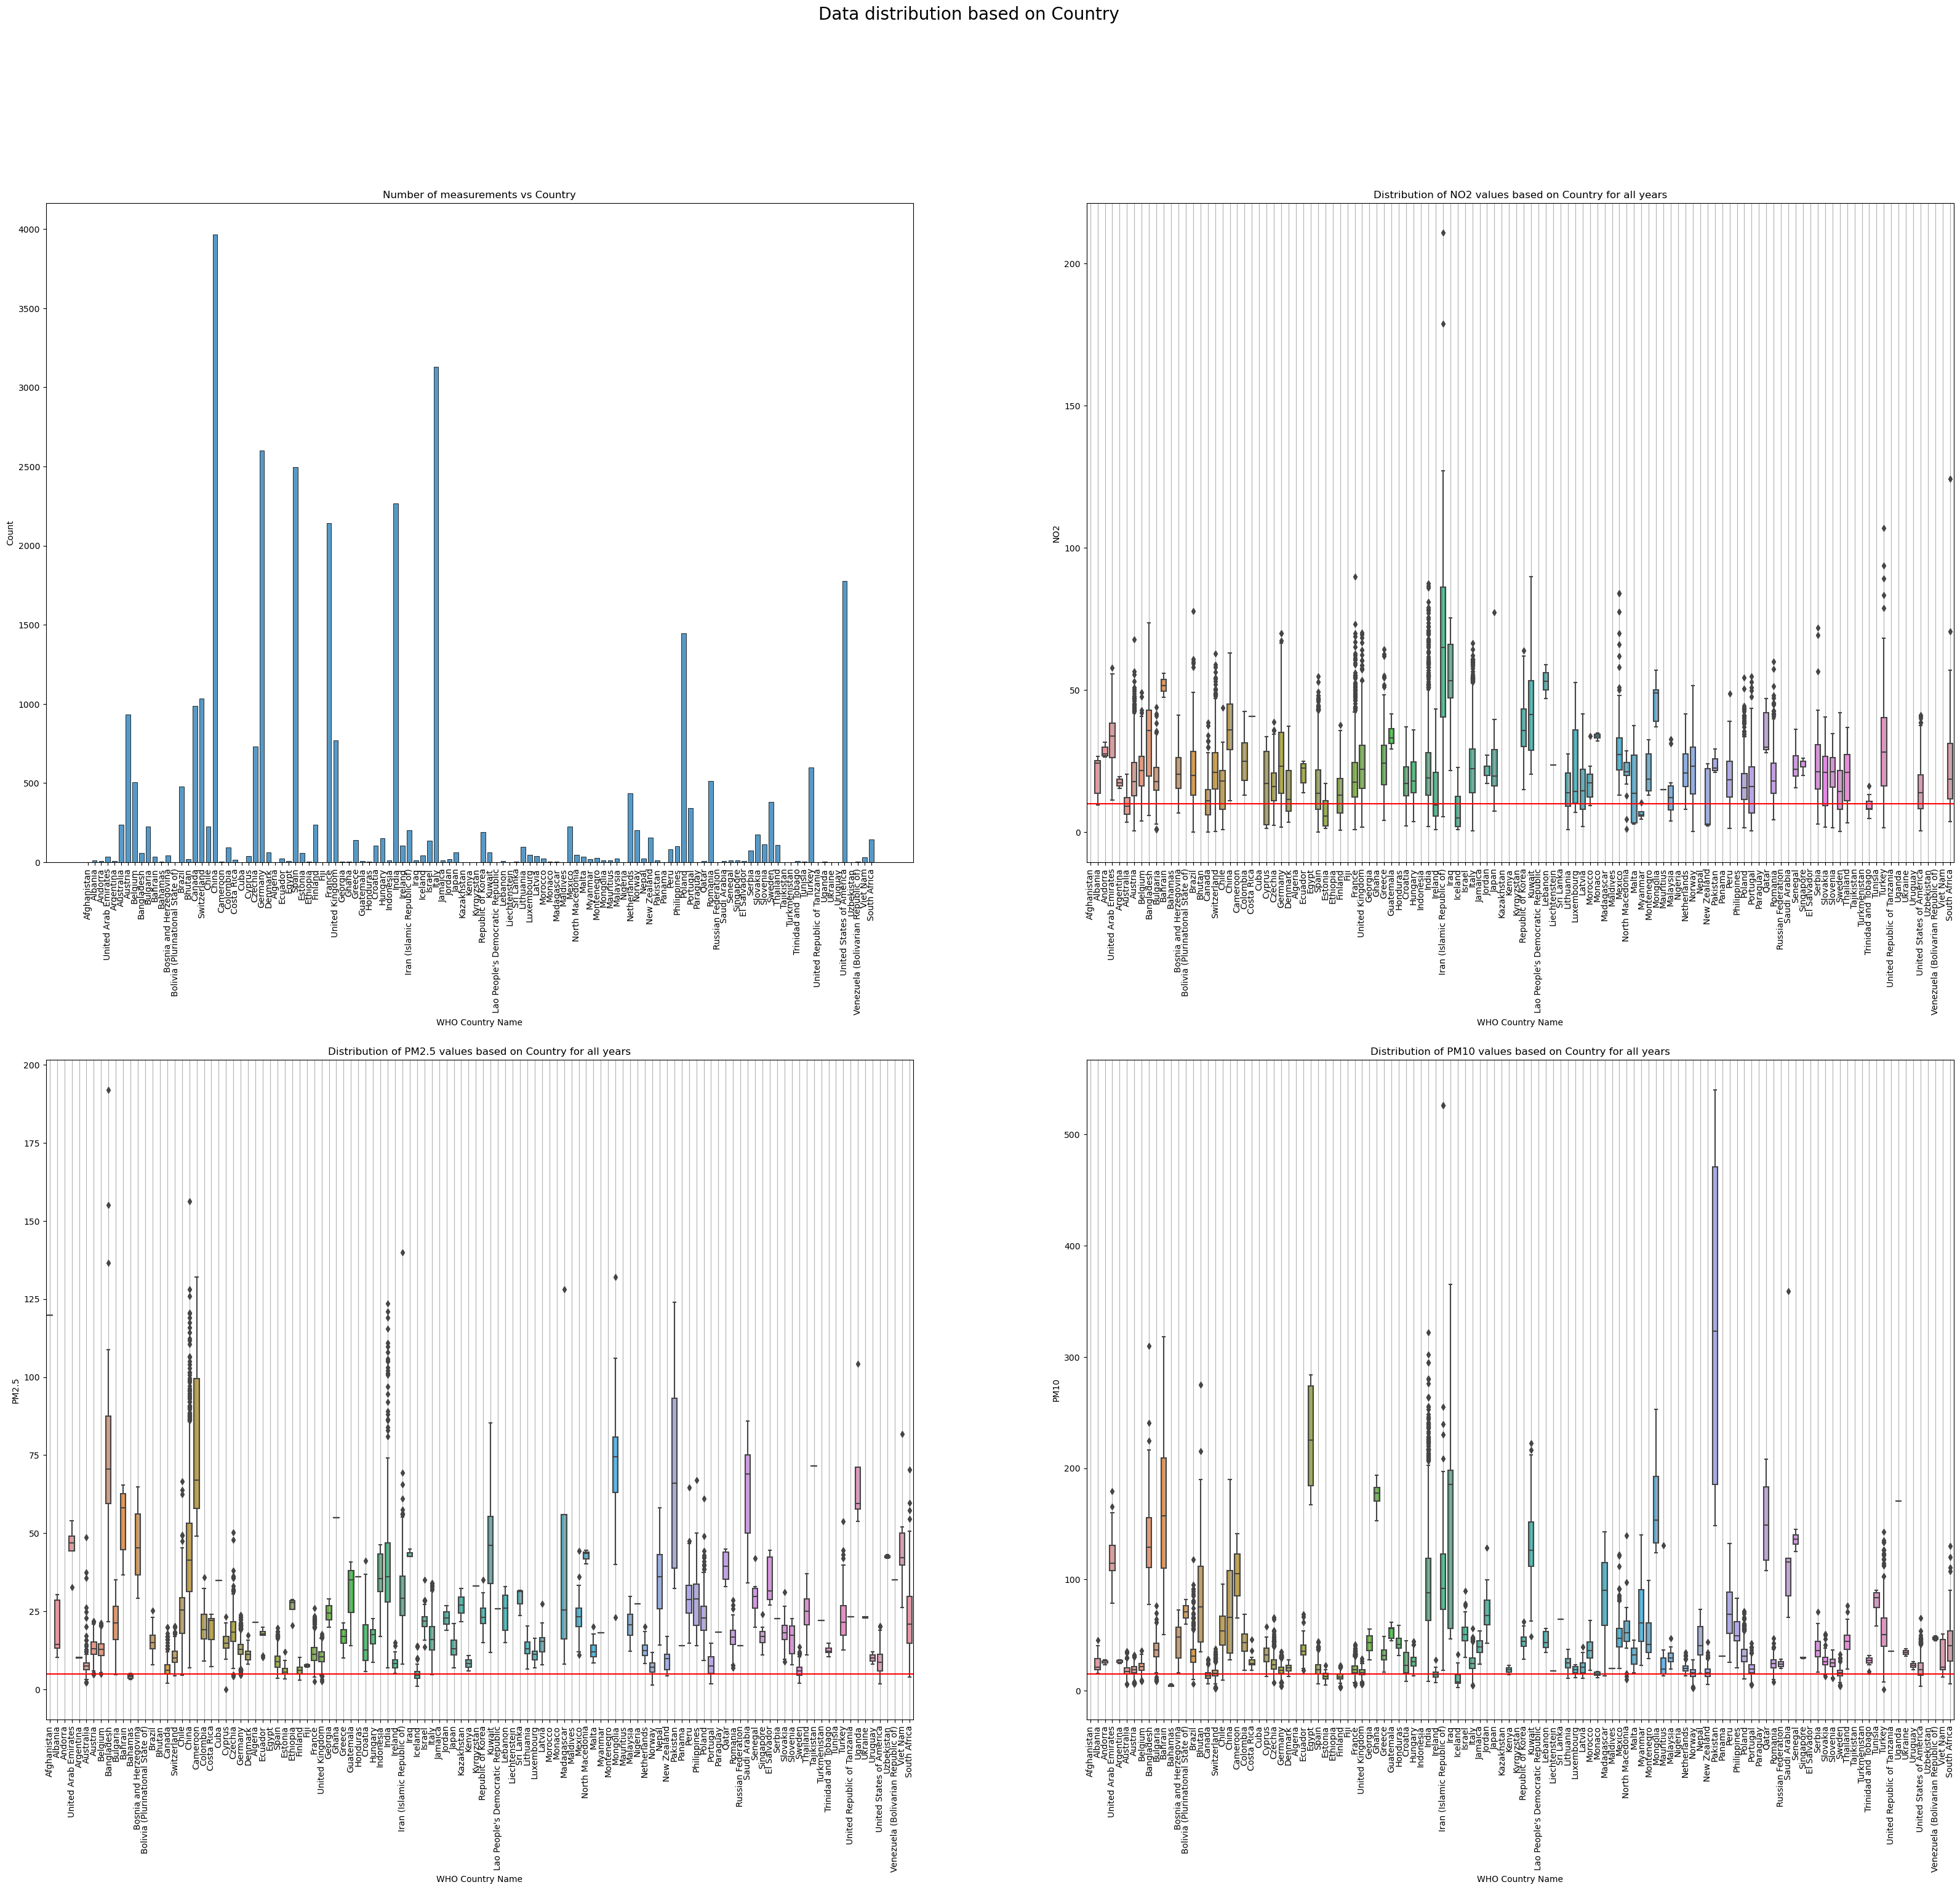

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(40, 32))

sns.histplot(data=data, x="WHO Country Name", ax=ax[0, 0], shrink=0.7)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)
ax[0, 0].set(title="Number of measurements vs Country")

sns.boxplot(data=data, y="NO2", x="WHO Country Name", ax=ax[0, 1], width=0.7)
ax[0, 1].axhline(y=10, color="r")
ax[0, 1].grid(axis="x")
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90)
ax[0, 1].set(title="Distribution of NO2 values based on Country for all years")

sns.boxplot(data=data, y="PM2.5", x="WHO Country Name", ax=ax[1, 0], width=0.7)
ax[1, 0].axhline(y=5, color="r")
ax[1, 0].grid(axis="x")
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90)
ax[1, 0].set(title="Distribution of PM2.5 values based on Country for all years")

sns.boxplot(data=data, y="PM10", x="WHO Country Name", ax=ax[1, 1], width=0.7)
ax[1, 1].axhline(y=15, color="r")
ax[1, 1].grid(axis="x")
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)
ax[1, 1].set(title="Distribution of PM10 values based on Country for all years")

plt.suptitle("Data distribution based on Country", fontsize=20)
plt.subplots_adjust(hspace=0.3)
plt.show()

#### Most and least polluted countries (across all years)

##### PM2.5

In [37]:
grouped_country_pm25 = data.groupby("WHO Country Name")["PM2.5"].mean()
grouped_country_pm25 = (
    pd.DataFrame(grouped_country_pm25).sort_values(by="PM2.5").dropna()
)
grouped_country_pm25.index[:3].to_list()

['Bahamas', 'Iceland', 'Estonia']

In [38]:
grouped_country_pm25.index[-3:].to_list()

['Bangladesh', 'Cameroon', 'Afghanistan']

In [39]:
grouped_country_pm25 = data.groupby("WHO Country Name")["PM2.5"].median()
grouped_country_pm25 = (
    pd.DataFrame(grouped_country_pm25).sort_values(by="PM2.5").dropna()
)
grouped_country_pm25.index[:3].to_list()

['Bahamas', 'Iceland', 'Estonia']

In [40]:
grouped_country_pm25.index[-3:].to_list()

['Tajikistan', 'Mongolia', 'Afghanistan']

##### PM10

In [41]:
grouped_country_pm10 = data.groupby("WHO Country Name")["PM10"].mean()
grouped_country_pm10 = (
    pd.DataFrame(grouped_country_pm10).sort_values(by="PM10").dropna()
)
grouped_country_pm10.index[:3].to_list()

['Bahamas', 'Iceland', 'Estonia']

In [42]:
grouped_country_pm10.index[-3:].to_list()

['Ghana', 'Egypt', 'Pakistan']

In [43]:
grouped_country_pm10 = data.groupby("WHO Country Name")["PM10"].median()
grouped_country_pm10 = (
    pd.DataFrame(grouped_country_pm10).sort_values(by="PM10").dropna()
)
grouped_country_pm10.index[:3].to_list()

['Bahamas', 'Iceland', 'Finland']

In [44]:
grouped_country_pm25.index[-3:].to_list()

['Tajikistan', 'Mongolia', 'Afghanistan']

##### NO2

In [45]:
grouped_country_no2 = data.groupby("WHO Country Name")["NO2"].mean()
grouped_country_no2 = pd.DataFrame(grouped_country_no2).sort_values(by="NO2").dropna()
grouped_country_no2.index[:3].to_list()

['Estonia', 'Myanmar', 'Iceland']

In [46]:
grouped_country_no2.index[-3:].to_list()

['Lebanon', 'Iraq', 'Iran (Islamic Republic of)']

In [47]:
grouped_country_no2 = data.groupby("WHO Country Name")["NO2"].median()
grouped_country_no2 = pd.DataFrame(grouped_country_no2).sort_values(by="NO2").dropna()
grouped_country_no2.index[:3].to_list()

['New Zealand', 'Iceland', 'Estonia']

In [48]:
grouped_country_no2.index[-3:].to_list()

['Lebanon', 'Iraq', 'Iran (Islamic Republic of)']

#### Biggest progress and regress in air polution

##### PM2.5

In [49]:
grouped = data.groupby(["WHO Country Name", "Measurement Year"]).mean(numeric_only=True)
grouped_pm25 = grouped.dropna(subset="PM2.5")

earliest = grouped_pm25.groupby(level=0)["PM2.5"].first()
latest = grouped_pm25.groupby(level=0)["PM2.5"].last()

difference = earliest - latest  # + --> progress; - --> regres

difference

WHO Country Name
Afghanistan                            0.000000
Albania                               11.470000
Algeria                                0.000000
Argentina                             -0.150000
Australia                              7.731667
                                        ...    
United States of America               2.427462
Uruguay                               -4.000000
Uzbekistan                             1.130000
Venezuela (Bolivarian Republic of)     0.000000
Viet Nam                              42.405000
Name: PM2.5, Length: 106, dtype: float64

In [50]:
difference.sort_values()[:3]

WHO Country Name
Indonesia    -29.350000
Madagascar   -24.000000
Mongolia     -13.966667
Name: PM2.5, dtype: float64

In [51]:
difference.sort_values()[-3:]

WHO Country Name
Viet Nam    42.405000
Uganda      44.150000
Pakistan    63.043333
Name: PM2.5, dtype: float64

##### PM10

In [52]:
grouped_pm10 = grouped.dropna(subset="PM10")

earliest = grouped_pm10.groupby(level=0)["PM10"].first()
latest = grouped_pm10.groupby(level=0)["PM10"].last()

difference = earliest - latest  # + --> progress; - --> regres

difference

WHO Country Name
Albania                              -13.910000
Andorra                                2.920000
Argentina                              2.370000
Australia                              0.902971
Austria                                7.610359
                                        ...    
United Republic of Tanzania            0.000000
United States of America               2.537980
Uruguay                                6.830000
Venezuela (Bolivarian Republic of)     4.000000
Viet Nam                               3.520000
Name: PM10, Length: 102, dtype: float64

In [53]:
difference.sort_values()[:3]

WHO Country Name
Bhutan       -111.5
Egypt         -93.5
Madagascar    -93.0
Name: PM10, dtype: float64

In [54]:
difference.sort_values()[-3:]

WHO Country Name
China       117.516667
Iraq        153.630000
Pakistan    247.163333
Name: PM10, dtype: float64

##### NO2

In [55]:
grouped_no2 = grouped.dropna(subset="NO2")

earliest = grouped_no2.groupby(level=0)["NO2"].first()
latest = grouped_no2.groupby(level=0)["NO2"].last()

difference = earliest - latest  # + --> progress; - --> regres

difference

WHO Country Name
Albania                     -6.115000
Andorra                      0.630000
Argentina                   -2.900000
Australia                   -1.861667
Austria                      5.462345
                              ...    
Trinidad and Tobago          0.900000
Turkey                       1.151245
United Arab Emirates       -12.878333
United Kingdom               6.645746
United States of America     4.529920
Name: NO2, Length: 77, dtype: float64

In [56]:
difference.sort_values()[:3]

WHO Country Name
Mexico                       -21.440000
Iran (Islamic Republic of)   -18.681250
United Arab Emirates         -12.878333
Name: NO2, dtype: float64

In [57]:
difference.sort_values()[-3:]

WHO Country Name
Latvia          21.580000
South Africa    22.011538
Kuwait          29.182364
Name: NO2, dtype: float64

#### Stations analysis

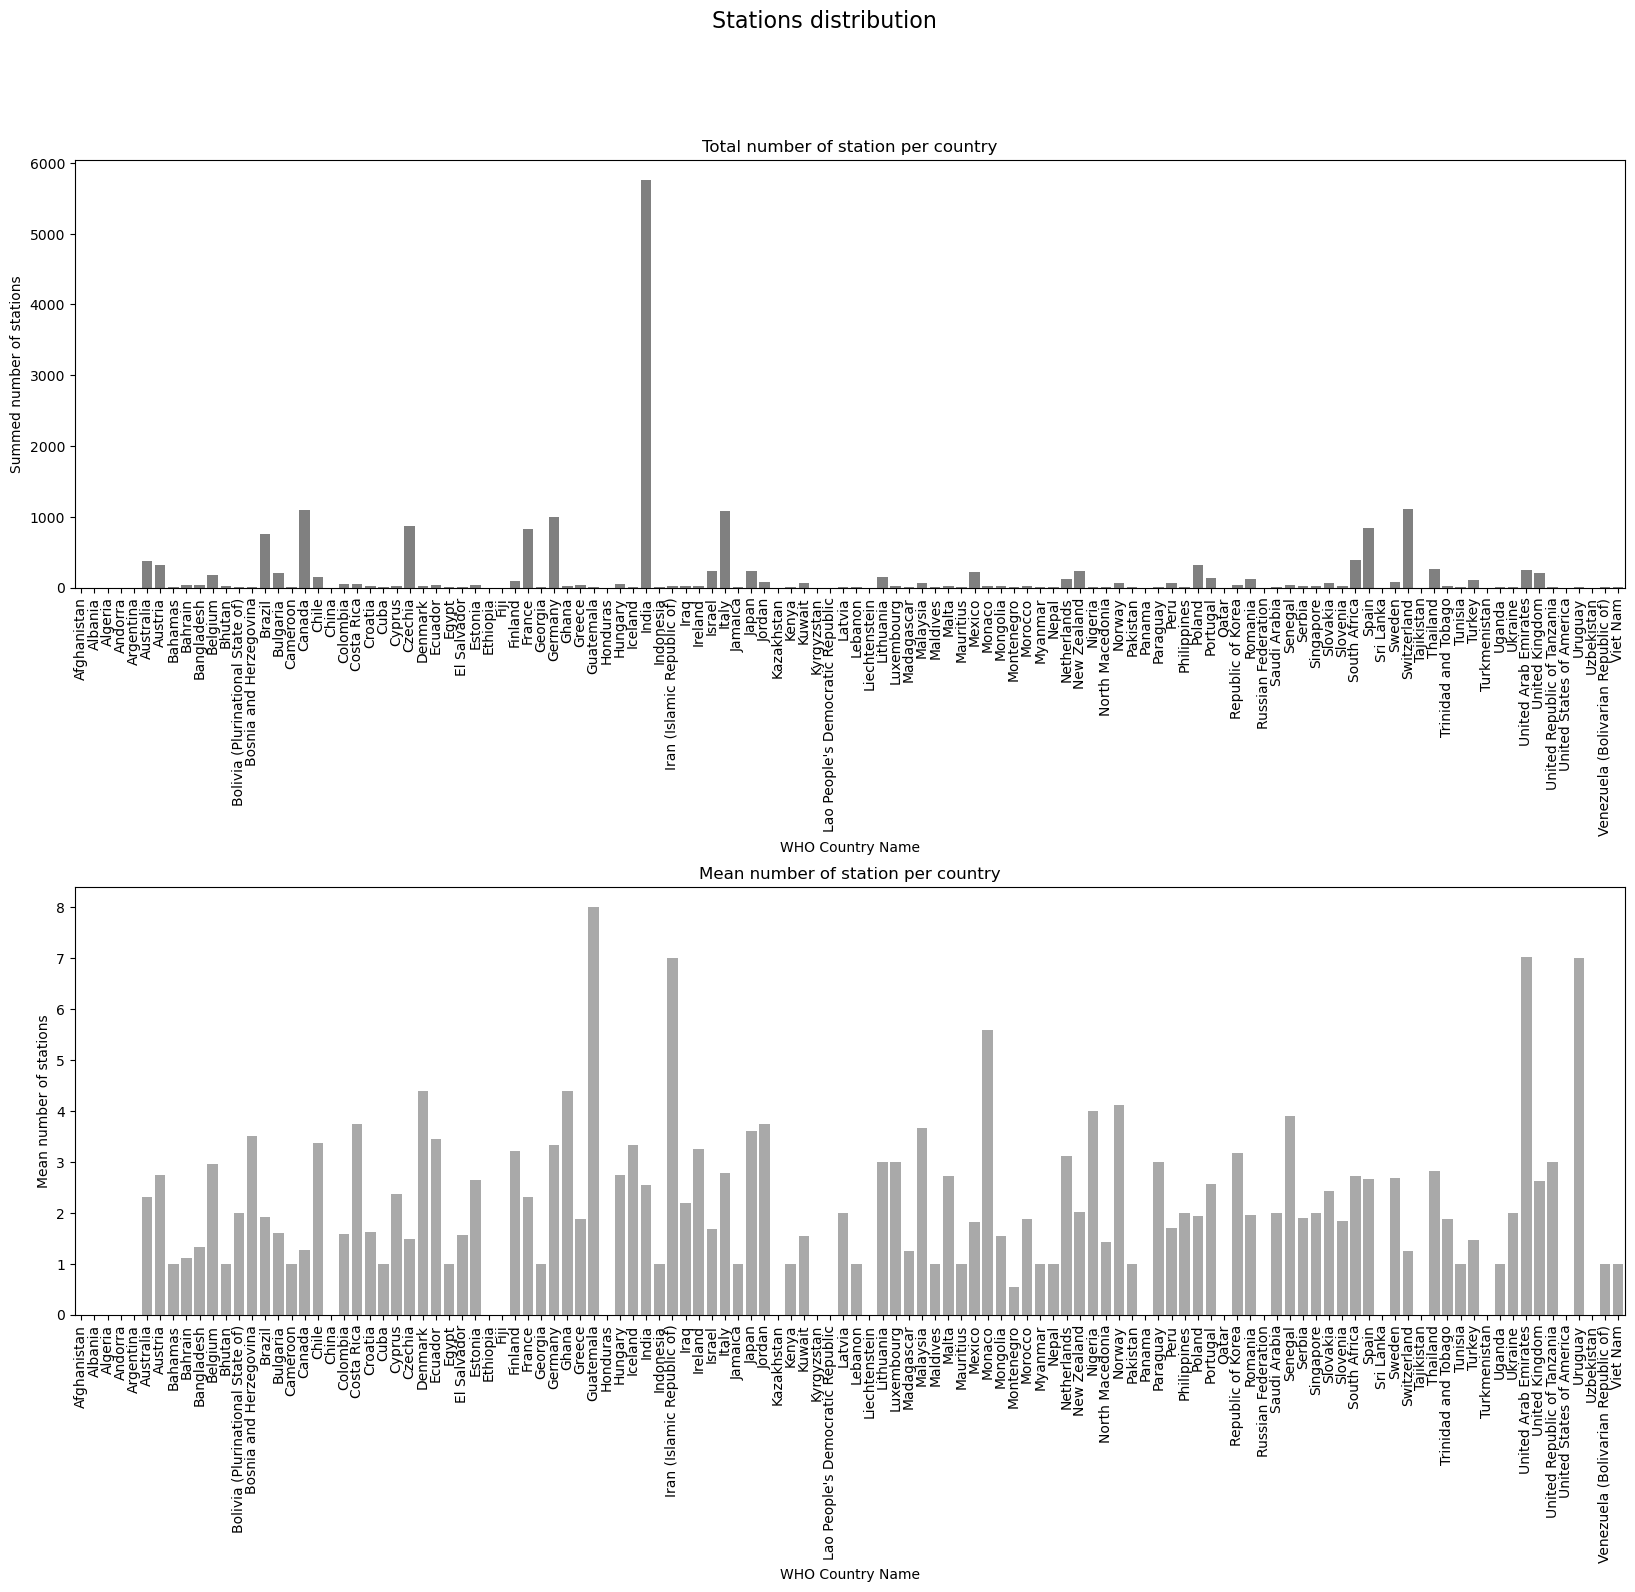

In [58]:
summed_stations_df = data.groupby("WHO Country Name")["Total number of stations"].sum()
mean_stations_df = data.groupby("WHO Country Name")["Total number of stations"].mean()

fig, ax = plt.subplots(2, 1, figsize=(20, 15))

sns.barplot(
    x=summed_stations_df.index, y=summed_stations_df.values, ax=ax[0], color="gray"
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set(
    title="Total number of station per country", ylabel="Summed number of stations"
)

sns.barplot(
    x=mean_stations_df.index, y=mean_stations_df.values, ax=ax[1], color="darkgrey"
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set(title="Mean number of station per country", ylabel="Mean number of stations")

plt.suptitle("Stations distribution", fontsize=16)
plt.subplots_adjust(hspace=0.7)
plt.show()

#### Air pollution map

##### PM2.5

In [59]:
import plotly.express as px

grouped_country_pm25 = data.groupby(["WHO Country Name", "ISO3"])["PM2.5"].mean()
df_grouped_country_pm25 = grouped_country_pm25.reset_index()

fig = px.choropleth(
    df_grouped_country_pm25,
    locations="ISO3",
    locationmode="ISO-3",
    color="PM2.5",
    hover_name="WHO Country Name",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.update_layout(
    title_text="Average concentration of PM2.5 across all years",
)

fig.show()

##### PM10

In [60]:
import plotly.express as px

grouped_country_pm10 = data.groupby(["WHO Country Name", "ISO3"])["PM10"].mean()
df_grouped_country_pm10 = grouped_country_pm10.reset_index()

fig = px.choropleth(
    df_grouped_country_pm10,
    locations="ISO3",
    locationmode="ISO-3",
    color="PM10",
    hover_name="WHO Country Name",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.update_layout(
    title_text="Average concentration of PM10 across all years",
)

fig.show()

##### NO2

In [61]:
import plotly.express as px

grouped_country_no2 = data.groupby(["WHO Country Name", "ISO3"])["NO2"].mean()
df_grouped_country_no2 = grouped_country_no2.reset_index()

fig = px.choropleth(
    df_grouped_country_no2,
    locations="ISO3",
    locationmode="ISO-3",
    color="NO2",
    hover_name="WHO Country Name",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.update_layout(
    title_text="Average concentration of NO2 across all years",
)

fig.show()

## City-based analysis